# Praca domowa 2

### Piotr Okonek
Na potrzeby tej pracy domowej przeanalizowałem swoje dwie bazy danych według podanych wytycznych. Poniżej prezentują się wyniki analiz.

## COVID-19-CT-Seg positive

### Informacje podstawowe

- **Rodzaj bazy danych**: obrazowa
- **Zadania**: segmentacja płuc
- **Rodzaj annotacji**: obramowanie jako zbiór punktów na zdjęciu
- **Choroby czy zmiany chorobowe**: brak masek
- **Rodzaj zdjęć**: 3D

### Dane ilościowe

- **Liczba zdjęć**: 120 (Dicom, ale dla każdego pacjenta różna liczba zdjęć)
- **Liczba unikatowych pacjentów**: 120
- **CT/RTG**: CT
- **Kompletność masek**: brak
- **Zdjęcia zdrowego pacjenta**: brak porównania
- **Dodatkowe informacje**: Została dołączona tabela z danymi pacjentów
    

### Informacje o danych

- **Rozszerzenie zdjęć**: DICOM
- **Sprzęt, na którym wykonano badania**: brak informacji
- **Format annotacji**: json
- **Płaszczyzny zdjęć: trzy rzuty**:  z przodu i z boku
- **Nazwy klas**: nie dotyczy, zadanie segmentacji
- **Kontrast**: brak
- **Data wykonania zdjęć**: brak informacji, jednak dane Covidowe, więc po 2020 roku i przed połową 2021 roku (data wrzucenia zbioru na stronę)
- **Slice Thickness**: 1,25 (taka liczba podana w metadanych)
- **Kształt zdjęć**: kwadratowe (512x512)
- **Podział na zbiór testowy i treningowy**: brak
- **Kraj pochodzenia zdjęć**: brak informacji

### Balans danych

- **Balans klas w zbiorze testowym i treningowym**: brak zbioru treningowego i testowego
- **Rozkład wieku pacjentów**: zbliżony do normalnego (Dokładne wykresy w pracy domowej 1)
- **Rozkład płci pacjentów**: 76 mężczyzn i 44 kobiety
- **Rozkład zdrowotności pacjentów**: wszyscy pacjenci w zbiorze są chorzy na COVID

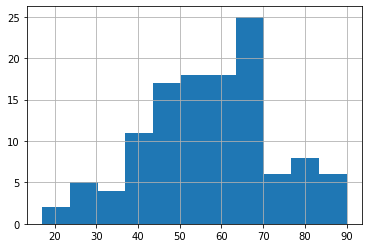

In [10]:
Path="D:/piotr/4 semestr/Warsztaty/Praca domowa 1/"
positive=pd.read_excel(Path+'positive.xlsx')
positive["Anon Age"].hist(bins=11)

### Analiza metadanych

- **Metadane**: dokładnie opisane w pracy domowej 1
- **Wiek**: wszystkie dane z dołączonej tabelki, lecz można je również odczytać z metadanych
- **Pomieszanie dzieci i dorosłych**: tylko dorośli
- **Braki w metadanych**: brak
- **Mierzenie poważności zmian**: brak
- **Pacjenci covidowi**: tak
- **Dane usunięte**: wszystkie

In [7]:
import pydicom
Path="D:/piotr/4 semestr/Warsztaty/negative/MIDRC-RICORD-1B/MIDRC-RICORD-1B-419639-000340/01-18-2005-NA-CT CHEST HIGH RESOLUTION-06379/2.000000-SUPINE CHEST RECON 12-09859/"
ds = pydicom.filereader.dcmread(Path+"/1-003.dcm")
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10.474.419639.210184992547118710998025375435
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID

W metadanych otrzymaliśmy dużo informacji. Te najważniejsze jak wiek, czy płeć można również odczytać z tabelki. 

## Chest-xray-pneumonia

### Informacje podstawowe

- **Rodzaj bazy danych**: obrazowa
- **Zadania**: klasyfikacja zapalenia płuc
- **Rodzaj annotacji**: zdjęcia podzielone są na foldery NORMAL i PNEUMONIA
- **Choroby czy zmiany chorobowe**: zainfekowane płuca
- **Rodzaj zdjęć**: 2D

### Dane ilościowe

- **Liczba zdjęć**: 5863
- **Liczba unikatowych pacjentów**: brak informacji; prawdopodobnie jedno zdjęcie jeden pacjent
- **CT/RTG**: RTG
- **Projekcje**: wszystkie zdjęcia w tej samej projekcji
- **Zdjęcia zdrowego pacjenta**: brak porównania

### Informacje o danych

- **Rozszerzenie zdjęć**: JPEG
- **Sprzęt, na którym wykonano badania**: brak informacji
- **Format annotacji**: brak
- **Płaszczyzny zdjęć**: rzut z przodu
- **Nazwy klas**: foldery nazwane NORMAL i PNEUMONIA
- **Kontrast**: brak
- **Data wykonania zdjęć**: brak informacji
- **Slice thickness**: nie dotyczy
- **Kształt zdjęć**: różny (patrz: kod poniżej)
- **Podział na zbiór testowy i treningowy**: tak, dodatkowo jest katalog val, w którym znajduje się po 8 zdjęć (Normal i Peumonia)
- **Kraj pochodzenia zdjęć**: brak informacji

### Balans danych

- **Balans klas w zbiorze testowym i treningowym**:
    - zbiór treningowy: 5216 zdjęć , w tym:
        - 3875 zdjęcia zainfekowanych płuc 
        - 1341 zdjęć zdrowych płuc 
    - zbiór testowy: 624 zdjęć, w tym:
        - 390 zdjęć zainfekowanych płuc 
        - 234 zdjęć zdrowych płuc 
- **Rozkład wieku pacjentów**: brak informacji
- **Rozkład płci pacjentów**: brak informacji
- **Rozkład zdrowotności pacjentów**: opisany wyżej

### Analiza metadanych

- **Metadane**: brak
- **Wiek**: brak informacji
- **Pomieszanie dzieci i dorosłych**: brak danych
- **Braki w metadanych**: brak
- **Mierzenie poważności zmian**: brak
- **Pacjenci covidowi**: nie wiadomo
- **Dane usunięte**: wszystkie

In [1]:
from os import listdir
from os.path import isfile, join
path = 'D:/piotr/4 semestr/Warsztaty/chest_xray'
all_files = []
train_pneumonia = [f for f in listdir(path+'/'+'train/PNEUMONIA') if isfile(join(path+'/'+'train/PNEUMONIA', f))]
for file in train_pneumonia:
    all_files.append(path+'/'+'train/PNEUMONIA/'+file)
train_normal = [f for f in listdir(path+'/'+'train/NORMAL') if isfile(join(path+'/'+'train/NORMAL', f))]
for file in train_normal:
    all_files.append(path+'/'+'train/NORMAL/'+file)
test_pneumonia = [f for f in listdir(path+'/'+'test/PNEUMONIA') if isfile(join(path+'/'+'test/PNEUMONIA', f))]
for file in test_pneumonia:
    all_files.append(path+'/'+'test/PNEUMONIA/'+file)
test_normal = [f for f in listdir(path+'/'+'test/NORMAL') if isfile(join(path+'/'+'test/NORMAL', f))]
for file in test_normal:
    all_files.append(path+'/'+'test/NORMAL/'+file)

In [2]:
from PIL import Image

width = []
height = []

for file in all_files:
    width.append(Image.open(file).size[0])
    height.append(Image.open(file).size[1])

Text(0, 0.5, 'height')

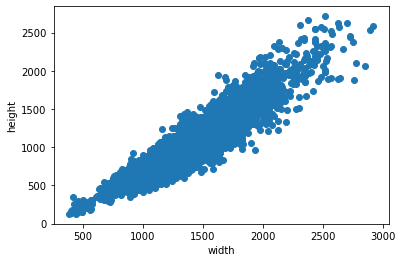

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
pneumonia_dataframe = pd.DataFrame({'width':width,'height':height})
plt.scatter(pneumonia_dataframe["width"],pneumonia_dataframe["height"])
plt.xlabel('width')
plt.ylabel('height')